# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Load the datasets

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

### Replace each question mark with the appropriate value.

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_test[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
import csv

### Read the signname file as a dictionary
### Throw away the CSV header if exists.
with open('signnames.csv', mode='r') as sign_name_file:
    has_header = csv.Sniffer().has_header(sign_name_file.read(1024))
    sign_name_file.seek(0)  # rewind
    reader = csv.reader(sign_name_file)
    if has_header:
        next(reader)
    sign_names = {int(row[0]): row[1] for row in reader}

print("::Signs in the dataset::\n")

print ("{:<8} {:<100}".format('Label','Name'))
for k, v in sorted(sign_names.items()):
    print("{:<8} {:<100}".format(k, v))

::Signs in the dataset::

Label    Name                                                                                                
0        Speed limit (20km/h)                                                                                
1        Speed limit (30km/h)                                                                                
2        Speed limit (50km/h)                                                                                
3        Speed limit (60km/h)                                                                                
4        Speed limit (70km/h)                                                                                
5        Speed limit (80km/h)                                                                                
6        End of speed limit (80km/h)                                                                         
7        Speed limit (100km/h)                                                                

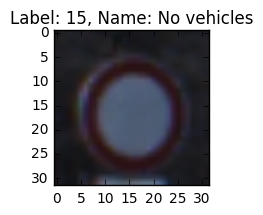

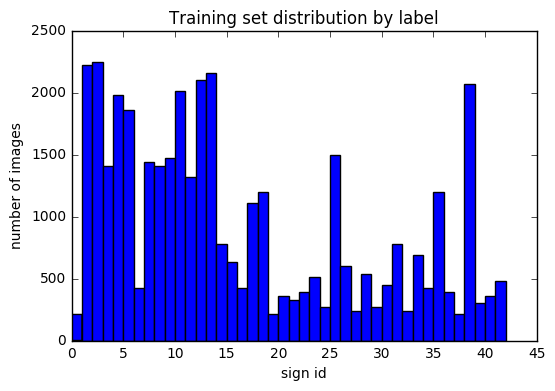

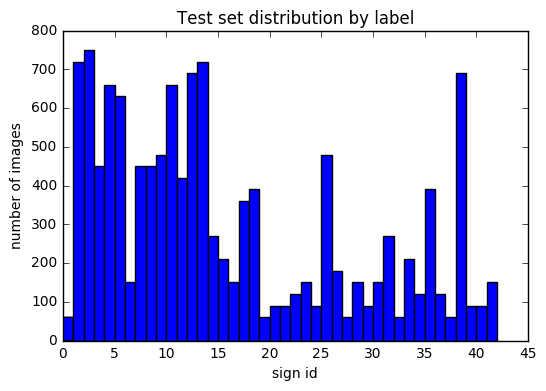

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_image(image, image_description):
    fig = plt.figure(figsize=(2,2))
    ax = fig.add_subplot(111)
    ax.set_title(image_description)
    plt.imshow(image, cmap='gray')
    plt.show()

def plot_random_image(image_data, image_labels):
    index = random.randint(0, len(image_data))
    image = image_data[index].squeeze()
    label = image_labels[index]
    plot_image(image, "Label: {}, Name: {}".format(label, sign_names[label]))

def plot_image_for_each_id(image_data, image_labels):
    for label, name in sorted(sign_names.items()):
        first_image_index = np.argmax(image_labels==label)
        image = image_data[first_image_index].squeeze()
        plot_image(image, "Label: {}, Name: {}".format(label, name))

plot_random_image(X_train, y_train)

print("\n")

### Plotting the training set distribution by label
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Training set distribution by label')
ax.set_xlabel('sign id')
ax.set_ylabel('number of images')
plt.hist(y_train, bins=range(min(y_train), max(y_train) + 1, 1))
plt.show()

### Plotting the test set distribution by label
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Test set distribution by label')
ax.set_xlabel('sign id')
ax.set_ylabel('number of images')
plt.hist(y_test, bins=range(min(y_test), max(y_test) + 1, 1))
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
import cv2

### helper methods

### This method takes as input an array of color images and convert it into grayscalse
def convert_to_grayscale(image_data):
    image_data_grayscale = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) for x in image_data])
    return image_data_grayscale.reshape(len(image_data_grayscale), 32, 32, 1)

### Image augmentation helpers
def rotate_image(image, angle):
    if angle == 0:
        return image

    image_center = tuple(np.array(image.shape)/2)
    rot_mat = cv2.getRotationMatrix2D(image_center,angle,1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape,flags=cv2.INTER_LINEAR)
    return result

angles = [-15,-10,-5,0,5,10,15]
redacted_angles = [-5,0,5]

def shear_image(image, side):
    rows,cols = image.shape
    if side == 'bottom_right_1':
        pts1 = np.float32([[0,0],[0,32],[32,32]])
        pts2 = np.float32([[0,0],[0,32],[25,25]])
        shear_mat = cv2.getAffineTransform(pts1,pts2)
    elif side == 'bottom_right_2':
        pts1 = np.float32([[0,0],[0,32],[32,32]])
        pts2 = np.float32([[0,0],[0,32],[20,20]])
        shear_mat = cv2.getAffineTransform(pts1,pts2)
    elif side == 'bottom_left_1':
        pts1 = np.float32([[32,0],[32,32],[0,32]])
        pts2 = np.float32([[32,0],[32,32],[5,25]])
        shear_mat = cv2.getAffineTransform(pts1,pts2)
    elif side == 'bottom_left_2':
        pts1 = np.float32([[32,0],[32,32],[0,32]])
        pts2 = np.float32([[32,0],[32,32],[10,20]])
        shear_mat = cv2.getAffineTransform(pts1,pts2)
    elif side == 'top_right_1':
        pts1 = np.float32([[0,32],[32,32],[32,0]])
        pts2 = np.float32([[0,32],[32,32],[25,5]])
        shear_mat = cv2.getAffineTransform(pts1,pts2)
    elif side == 'top_right_2':
        pts1 = np.float32([[0,32],[32,32],[32,0]])
        pts2 = np.float32([[0,32],[32,32],[20,10]])
        shear_mat = cv2.getAffineTransform(pts1,pts2)
    elif side == 'top_left_1':
        pts1 = np.float32([[0,0],[0,32],[32,32]])
        pts2 = np.float32([[5,5],[0,32],[32,32]])
        shear_mat = cv2.getAffineTransform(pts1,pts2)
    elif side == 'top_left_2':
        pts1 = np.float32([[0,0],[0,32],[32,32]])
        pts2 = np.float32([[10,10],[0,32],[32,32]])
        shear_mat = cv2.getAffineTransform(pts1,pts2)
    elif side == 'none':
        return image
    
    dst = cv2.warpAffine(image, shear_mat,(cols,rows))
    return dst

shears = ['none','bottom_right_1', 'bottom_right_2', 'bottom_left_1', 
          'bottom_left_2', 'top_right_1', 'top_right_2', 'top_left_1', 'top_left_2']
redacted_shears = ['bottom_right_1', 'bottom_left_1', 'top_right_1', 'top_left_1']

def translate_image(image, trans_x, trans_y):
    rows,cols = image.shape
    trans_mat = np.float32([[1,0,trans_x],[0,1,trans_y]])
    dst = cv2.warpAffine(image,trans_mat,(cols,rows))
    return dst

translations = [(0,0), (5,5), (10,10), (-5,-5), (-10, -10), (-5,5), (-10, 10), (5, -5), (10, -10)]
redacted_translations = [(5,5), (-5,-5), (-5,5), (5, -5)]

def min_max_scale(image_data):
    b = 0.9
    a = 0.1
    b_minus_a = b - a
    x_min = 0
    x_max = 255
    max_min_diff = x_max - x_min
    
    return ((b_minus_a) * (image_data - x_min) / max_min_diff) + a

In [18]:
from sklearn.model_selection import train_test_split

### Preprocess the data here.

### Step 1: Split the training data into training and validation data with some randomness
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

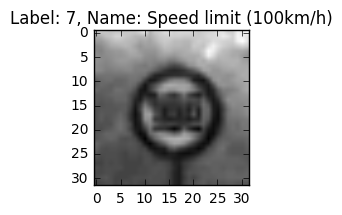

In [7]:
### Step 2: Convert all data sets to grayscale

X_train = convert_to_grayscale(X_train)
X_validation = convert_to_grayscale(X_validation)
X_test = convert_to_grayscale(X_test)

# Show a grayscale image
plot_random_image(X_train, y_train)

In [8]:
### Step 3: Augment the training data
new_images = []
new_y_train = []

print ("starting data generation phase")
for index in range(len(X_train)):
    if index % 5000 == 0:
        print("doing ", index)
    image = X_train[index].squeeze()
    
    for angle in redacted_angles:
        new_image = rotate_image(image, angle)
        new_image = new_image.reshape(32,32,1)
        new_images.append(new_image)
        new_y_train.append(y_train[index])
    for trans_x, trans_y in redacted_translations:
        new_image = translate_image(image, trans_x, trans_y)
        new_image = new_image.reshape(32,32,1)
        new_images.append(new_image)
        new_y_train.append(y_train[index])
    for shear in redacted_shears:
        new_image = shear_image(image, shear)
        new_image = new_image.reshape(32,32,1)
        new_images.append(new_image)
        new_y_train.append(y_train[index])

print ("completed data generation phase, generated {} images".format(len(new_images)))

X_train = np.append(X_train, new_images, axis=0)
y_train = np.append(y_train, new_y_train, axis=0)

starting data generation phase
doing  0
doing  5000
doing  10000
doing  15000
doing  20000
doing  25000
doing  30000
completed data generation phase, generated 345037 images


In [9]:
### Step4: Shuffle the datasets

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_validation, y_validation = shuffle(X_validation, y_validation)
X_test, y_test = shuffle(X_test, y_test)

In [10]:
### Step 5: Min-Max Scale the datasets

X_train = min_max_scale(X_train)
X_validation = min_max_scale(X_validation)
X_test = min_max_scale(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 
For data pre-processing I chose to do following:
* Split the test data into test and validation set. The validation data is 20% of the original training data. I will be using this training data to measure accuracy of my model while its in process of training.

* Next step is to convert all the images to grayscale. Based on my data exploration, I can clearly see that color, in case of this dataset, is not providing any additional information. This is not to say that its not an important feature of traffic sign, but more that the shape of the sign and the markings inside it are more valuable for the model to learn. Reducing images into grayscale also allows me to train the model faster as well as on more images without running into memory limitations.


* Next step is to generate more data from the training data. I take each image in training data and generate:
  * Rotate image at different reasonable angles which I can assume I will encounter in real life images
  * Translate the image into top-left, top-right, bottom-left, bottom-right corners by some amount
  * Shear the image to account for images taken at reasonable views
    * Note that I have used the redacted list of the transformations, this was done because with the complete list of translations, I was generating datasets that were larger then what the gpu instance could handle. I cannot say for certain that the additional dataset would have improved accuracy of my model. However, considering the fact that when I augmented the data, my model performance improves significantly over the vanialla dataset, I am inclined to belive it might improve the accuracy, but I can't say by how much.

* I then go ahead and run one pass of data shuffling to avoid any ordering in the dataset to make an impact on the overall efficacy of the trained model.

* After this, I apply min-max scaling to the images to reduce the data range down from (0-255) to (0.1-0.9). Min-Max scaling performs linear transfomration on the data while preserving the relationship with the original values. The scaling (also called normalization) can remove the impact of features that have larger range then the features that have smaller range. For instance, if a feature ranges from 0-100 and another 0-1000000 then the large range of the second variable can impact the learning (and hence) prediction accuracy. Normalization subverts any impact in model learning that can happen due to large data ranges of certian features.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

* Input training data from the train.p file was split into training and validation data at (80, 20) split. The testing data is the data read from test.p.

* For additional data generation, for each image in training set, I generated few rotated, translated and sheared images. More about this is explained in response to question 1 above.

* The new augemented dataset, tries to mimic a bunch of possible real life variations that we can encounter in the image dataset for the traffic signs due to varying views that the sensor has of the traffic sign, at the time of capturing the image.

In [11]:
### Define your architecture here.
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

In [12]:
from tensorflow.contrib.layers import flatten

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [13]:
### Network Helper Methods

keep_prob = 0.5
mu = 0
sigma = 0.1

weights = []
biases = []

def get_conv_layer(input_conv, input_depth, output_depth, with_max_pooling=True):
    conv_W = tf.Variable(tf.truncated_normal(shape=(5,5,input_depth,output_depth), mean = mu, stddev = sigma)) 
    conv_b = tf.Variable(tf.zeros(output_depth))
    conv   = tf.nn.conv2d(input_conv, conv_W, strides=[1, 1, 1, 1], padding='VALID') + conv_b
    
    # Activation
    conv = tf.nn.relu(conv)
    
    # Pooling
    if with_max_pooling:
        conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Track weights for l2 regularization
    weights.append(conv_W)
    biases.append(conv_b)
    
    return conv

def get_fully_connected_layer(input_layer, input_size, output_size, with_activation=False, with_dropout=False):
    fc_W = tf.Variable(tf.truncated_normal(shape=(input_size, output_size), mean=mu, stddev=sigma))
    fc_b = tf.Variable(tf.zeros(output_size))
    fc = tf.add(tf.matmul(input_layer, fc_W), fc_b)
    
    # Activation
    if with_activation:
        fc = tf.nn.relu(fc)
    
    # Dropout
    if with_dropout:
        fc = tf.nn.dropout(fc, keep_prob)
    
    # Track weights for l2 regularization
    weights.append(fc_W)
    biases.append(fc_b)
    
    return fc

In [14]:
### Network Definition

def network(x):
    # Running convolutions
    conv_1 = get_conv_layer(x, 1, 32, with_max_pooling=False)
    conv_2 = get_conv_layer(conv_1, 32, 32)
    conv_3 = get_conv_layer(conv_2, 32, 64, with_max_pooling=False)
    conv_4 = get_conv_layer(conv_3, 64, 64)
    
    # Flattening
    flattened = flatten(conv_4)
    
    # Running fully connected layers
    fc1 = get_fully_connected_layer(flattened, 256, 120, with_activation=True, with_dropout=True)
    logits = get_fully_connected_layer(fc1, 120, 43)
    
    return logits

In [15]:
### Define the training pipeline
rate = 0.001
regularization_rate = 0.0001

logits = network(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# initialize loss to cross entropy loss
loss_operation = tf.reduce_mean(cross_entropy)

# add l2 regularization as a loss metric for weights and biases
for weight in weights:
    loss_operation += regularization_rate * tf.nn.l2_loss(weight)
for bias in biases:
    loss_operation += regularization_rate * tf.nn.l2_loss(bias)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
### Define evaluation pipeline
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

pred_opn = tf.nn.softmax(logits)

batch_accuracies = []
validation_accuracies = []

def get_softmax_pred(X_data, y_data, top_k=3):
    sess = tf.get_default_session() 
    return sess.run(tf.nn.top_k(pred_opn, k=top_k), feed_dict={x: X_data, y: y_data})

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        batch_accuracies.append(accuracy)
        
    validation_accuracy=(total_accuracy / num_examples)
    validation_accuracies.append(validation_accuracy)
    return validation_accuracy

def chart_accuracy_graphs():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Batch Accuracies')
    ax.set_xlabel('percentage')
    ax.set_ylabel('count')
    ax.set_ylim([0,1.1])
    plt.plot(range(len(batch_accuracies)), batch_accuracies, 'r')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Validation Accuracies')
    ax.set_xlabel('percentage')
    ax.set_ylabel('epoch')
    ax.set_ylim([0,1.1])
    plt.plot(range(len(validation_accuracies)), validation_accuracies, 'b')
    plt.show()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
My network has 4 convolution layers followed by 2 fully connected layers with a mix of pooling and RELU layers. I am also using dropout in fc layer and l2 normalization of weights & biases to avoid overfitting. Here is how my network looks in a diagrammatic form:

<img src="network_diagram.jpg">

In [17]:
### Train your model here.
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic_sign_classifier')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.982

EPOCH 2 ...
Validation Accuracy = 0.993

EPOCH 3 ...
Validation Accuracy = 0.995

EPOCH 4 ...
Validation Accuracy = 0.992

EPOCH 5 ...
Validation Accuracy = 0.997

EPOCH 6 ...
Validation Accuracy = 0.996

EPOCH 7 ...
Validation Accuracy = 0.996

EPOCH 8 ...
Validation Accuracy = 0.995

EPOCH 9 ...
Validation Accuracy = 0.998

EPOCH 10 ...
Validation Accuracy = 0.997

EPOCH 11 ...
Validation Accuracy = 0.998

EPOCH 12 ...
Validation Accuracy = 0.997

EPOCH 13 ...
Validation Accuracy = 0.998

EPOCH 14 ...
Validation Accuracy = 0.998

EPOCH 15 ...
Validation Accuracy = 0.998

EPOCH 16 ...
Validation Accuracy = 0.998

EPOCH 17 ...
Validation Accuracy = 0.998

EPOCH 18 ...
Validation Accuracy = 0.997

EPOCH 19 ...
Validation Accuracy = 0.992

EPOCH 20 ...
Validation Accuracy = 0.998

Model saved


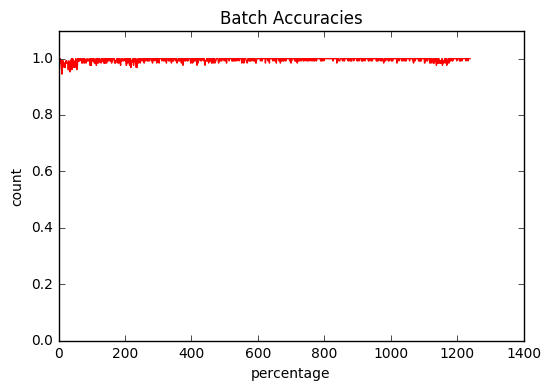

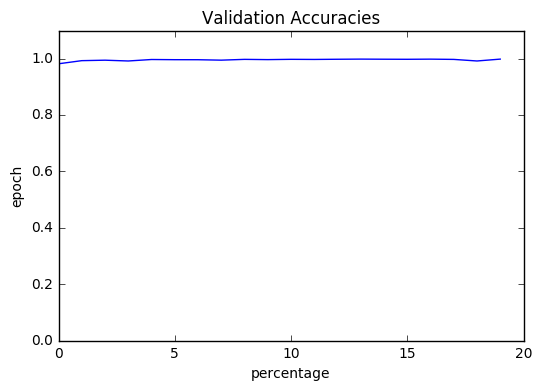

In [19]:
chart_accuracy_graphs()

In [24]:
### Testing model with Test dataset
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.979


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* Optimizer: I chose to use the Adam Optimizer on a combination of Cross Entropy and L2 Regularization. I tried with different learning rates and rates for L2 regularization. The ones that are present in the solution produced the best results. I also tried with the gradient descent optimizer, but the Adam Optimizer produced better results.

* Batch Size/Epochs: The batch size is kept at 128. I kept the Epoch to 20 as I could see I wasn't getting any significant improvements beyond these number of epochs. In future, I can also add early stopping to avoid any overfitting that may happen.

* Hyperparameters: I tuned the following hyperparameter to achieve the best results:
  * Learning rate
  * L2 regularization rate
  * For dropout layer, keep probability
  * mu and sigma for initializing the weight matrices and the bias vectors.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started out without preprocessing of the data, with brought me close to 91% accuracy for validation and about 89% accuracy for test. However, once I added the processed images, the performance improved significantly. However, I was still getting about a 6% gap between the validation accuracy and the test accuracy. To bring that down, I introduced the dropout layer as well as the L2 Regularization. In conjunction with that, I increased the number of Convolution layers and tunrned max pooling off for a couple of them to allow my network to learn more complex patterns.

My solution is deeply inspired by the LeNet architecutre. LeNet seems to work really well for classification problems, especially with a small number of classes. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

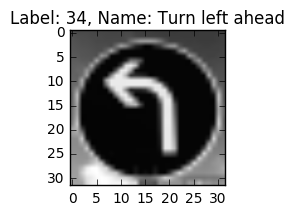

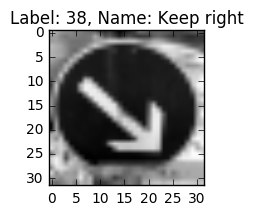

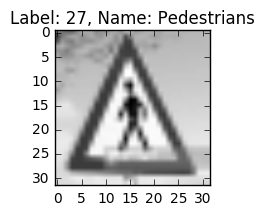

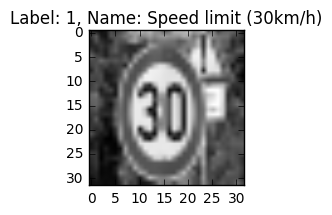

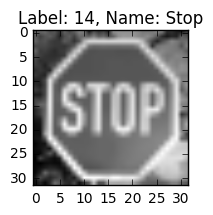

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from os import listdir
from os.path import isfile, join
import matplotlib.image as mpimg
from cv2 import INTER_AREA

test_images_dir = 'new_images'
test_files = [join(test_images_dir, f) for f in listdir(test_images_dir) 
              if not f.startswith('.') and isfile(join(test_images_dir, f))]

# crop input images to the place where the region of interest is
image_crop_params = {
    "new_images/keep_right.jpg": [38,0,350,0,None], 
    "new_images/pedestrian.jpg": [27,50,375,0,None],
    "new_images/speed_30.jpg": [1,275,500,0,None],
    "new_images/stop.jpg": [14,0,700,0,None],
    "new_images/turn_left_ahead.jpg": [34,100,500,250,750]}

test_images = []
test_images_labels = []

for file in test_files:
    image = mpimg.imread(file)
    label,x1,x2,y1,y2 = image_crop_params[file]
    image_section = image[x1:x2, y1:y2]
    scaled_down_image = cv2.resize(image_section, (32,32), interpolation=INTER_AREA)
    test_images.append(scaled_down_image)
    test_images_labels.append(label)

grayscale_test_images = convert_to_grayscale(test_images)
for image, label in zip(grayscale_test_images, test_images_labels):
    image = image.squeeze()
    plot_image(image, "Label: {}, Name: {}".format(label, sign_names[label]))

X_test_images = min_max_scale(grayscale_test_images)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I pulled a bunch of images from internet for the german traffic signs. The images are downscaled from much higher resolution. 

A couple of images have some form of shear and slight rotation from normal. This might be an interesting thing for me to test my model with, especially because I have tried to account for these cases in my training set.

In [22]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
print("Running test on new data")
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_images, test_images_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Running test on new data
Test Accuracy = 1.000


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Yes, my model is able to classify the test images with 100% accuracy over multiple runs.

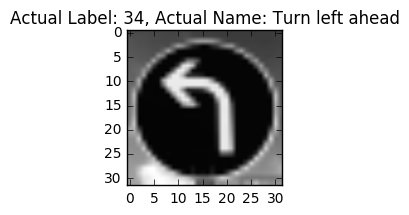

Top 3 predictions with there certainities are: 

Label: 34, Certainity: 1.00000
Label: 16, Certainity: 0.00000
Label: 40, Certainity: 0.00000


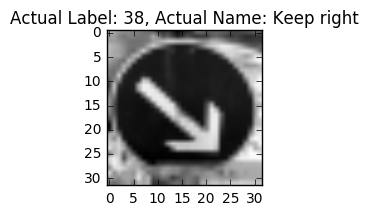

Top 3 predictions with there certainities are: 

Label: 38, Certainity: 0.99998
Label: 12, Certainity: 0.00002
Label: 17, Certainity: 0.00000


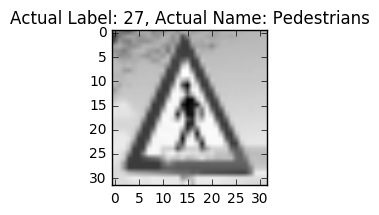

Top 3 predictions with there certainities are: 

Label: 27, Certainity: 1.00000
Label: 11, Certainity: 0.00000
Label: 18, Certainity: 0.00000


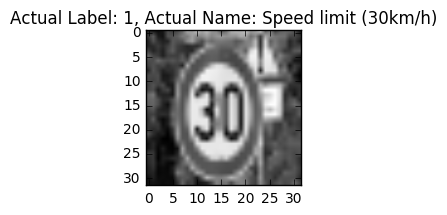

Top 3 predictions with there certainities are: 

Label: 1, Certainity: 1.00000
Label: 0, Certainity: 0.00000
Label: 4, Certainity: 0.00000


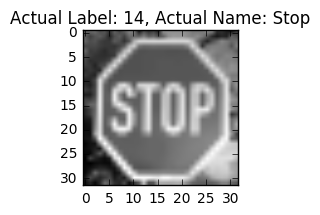

Top 3 predictions with there certainities are: 

Label: 14, Certainity: 1.00000
Label: 2, Certainity: 0.00000
Label: 13, Certainity: 0.00000


In [30]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = get_softmax_pred(X_test_images, test_images_labels)

for i in range(len(X_test_images)):
    image = grayscale_test_images[i]
    image = image.squeeze()
    pred_certainities = predictions[0][i]
    pred_indices = predictions[1][i]
    actual_label = test_images_labels[i]
    plot_image(image, "Actual Label: {}, Actual Name: {}".format(actual_label, sign_names[actual_label]))
    print("Top 3 predictions with there certainities are: \n")
    for k, v in zip(pred_indices, pred_certainities):
        print("Label: {}, Certainity: {:.5f}".format(k, v))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

My model is performing really well. In 4 of 5 cases the correct label has predicted with 100% certainity and 1 case the correct label is predicted with 99.998% certainity. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.